In [69]:
from keras.datasets import reuters

In [70]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [71]:
#Preparing the data
#Encoding 

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [72]:
#One-hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [73]:
#Model Definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [74]:
#Compiling model

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [75]:
#Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [76]:
#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/step - loss: 2.5829 - accuracy: 0.5321 - val_loss: 1.6936 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 2s 199us/step - loss: 1.3782 - accuracy: 0.7055 - val_loss: 1.2930 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 187us/step - loss: 1.0325 - accuracy: 0.7759 - val_loss: 1.1245 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.8093 - accuracy: 0.8279 - val_loss: 1.0259 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.6443 - accuracy: 0.8637 - val_loss: 0.9806 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.5149 - accuracy: 0.8935 - val_loss: 0.9087 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 180us/step - loss

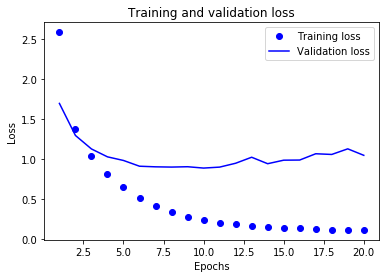

In [77]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

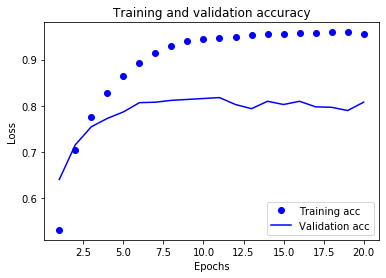

In [78]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 181us/step - loss: 2.6083 - accuracy: 0.5375 - val_loss: 1.7086 - val_accuracy: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 170us/step - loss: 1.4113 - accuracy: 0.7087 - val_loss: 1.3246 - val_accuracy: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 176us/step - loss: 1.0490 - accuracy: 0.7764 - val_loss: 1.1367 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 160us/step - loss: 0.8293 - accuracy: 0.8251 - val_loss: 1.0298 - val_accuracy: 0.7930
Epoch 5/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.6633 - accuracy: 0.8641 - val_loss: 0.9720 - val_accuracy: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.5301 - accuracy: 0.8921 - val_loss: 0.9177 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.424

In [80]:
#final results:

results

[0.9640655574900491, 0.7876224517822266]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [81]:
import copy

In [82]:
test_labels_copy = copy.copy(test_labels)

In [83]:
np.random.shuffle(test_labels_copy)

In [84]:
 hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [85]:
float(np.sum(hits_array)) / len(test_labels)

0.19545859305431879

In [86]:
#Generating predictions on new data

predictions = model.predict(x_test)

In [87]:
predictions[0].shape

(46,)

In [88]:
np.sum(predictions[0])

1.0

In [89]:
 np.argmax(predictions[0])

3